<a href="https://colab.research.google.com/github/geovannathereza/Analise_Score/blob/main/An%C3%A1lise_de_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score

O Score de crédito é um método consolidado no mercado financeiro para proteção contra a inadimplência, sendo capaz de facilitar a tomada de decisão de instituições financeiras. Ao utilizar modelos estatísticos e inteligência artificial, é possível calcular quais são as chances do tomador de crédito conseguir pagar o financiamento no futuro.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 1. Coleta e entendimento dos dados

   - Os dados abaixo ilustram os clientes de uma instituição financeira.

   - Dicionário de dados:
     - **CODIGO_CLIENTE:** Identificador único do cliente
     - **UF:** Unidade Federativa (estado) do cliente (ex: SP, RJ, MG)
     - **IDADE:** Idade do cliente em anos
     - **ESCOLARIDADE:** Nível de escolaridade (ex: Fundamental, Médio, Superior, etc.)
     - **ESTADO_CIVIL:** Estado civil do cliente (ex: Solteiro, Casado, Divorciado)
     - **QT_FILHOS:** Quantidade de filhos
     - **CASA_PROPRIA:** Indica se possui casa própria (ex: Sim, Não)
     - **QT_IMOVEIS:** Quantidade de imóveis que o cliente possui
     - **VL_IMOVEIS:** Valor total estimado dos imóveis
     - **OUTRA_RENDA:** Indica se o cliente possui outra fonte de renda (ex: Sim, Não)
     - **OUTRA_RENDA_VALOR:** Valor da outra renda (caso aplicável)
     - **TEMPO_ULTIMO_EMPREGO_MESES:** Tempo em meses no último emprego
     - **TRABALHANDO_ATUALMENTE:** Indica se o cliente está trabalhando atualmente (ex: Sim, Não)
     - **ULTIMO_SALARIO:** Valor do último salário (pode conter formatação como R$ e separadores)
     - **QT_CARROS:** Quantidade de carros que o cliente possui
     - **VALOR_TABELA_CARROS:** Valor total dos carros segundo a tabela FIPE
     - **SCORE:** Score de crédito do cliente (pontuação de risco financeiro)

   - O dataframe contém 10.476 linhas e 17 colunas sendo elas 9 com valores inteiros, 1 com valores reais e 7 com strings.

In [ ]:
df = pd.read_excel('dados_credito.xlsx')

In [ ]:
df.shape

(10476, 17)

In [ ]:
df.head()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667


In [ ]:
df.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

## 2. EDA

Nesta etapa nos é apresentada as estatísticas básicas do dataset, como média, mediana e desvio padrão. Na Análise Exploratória de Dados também foi feito o tratamento de valores ausentes, um boxplot para verificar a existência de outliers, remoção dos outliers na coluna 'QT_FILHOS' e por fim, através do heatmap foi possível descobrir que as variáveis 'VL_IMOVEIS', 'TEMPO_ULTIMO_EMPREGO_MESES' e 'ULTIMO_SALARIO' tem maior correlação com o váriavel 'SCORE' que queremos prever.

In [ ]:
df = df.drop(['CODIGO_CLIENTE'], axis=1)

In [ ]:
df.groupby(['ULTIMO_SALARIO']).size()

,0
ULTIMO_SALARIO,
1800,846
2200,792
3100,792
3900,792
4500,468
4800,792
5300,522
6100,522
6800,611


In [ ]:
df.replace('SEM DADOS', np.nan, inplace = True)

In [ ]:
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].astype(np.float64)

In [ ]:
df.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [ ]:
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].fillna((df['ULTIMO_SALARIO'].median()))

In [ ]:
df.isnull().sum()

,0
UF,0
IDADE,0
ESCOLARIDADE,0
ESTADO_CIVIL,0
QT_FILHOS,0
CASA_PROPRIA,0
QT_IMOVEIS,0
VL_IMOVEIS,0
OUTRA_RENDA,0
OUTRA_RENDA_VALOR,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [ ]:
df.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [ ]:
colunas_numericas = []
for i in df.columns[0:16].tolist():
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64' :
    print(i, ':', df.dtypes[i])
    colunas_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [ ]:
colunas_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

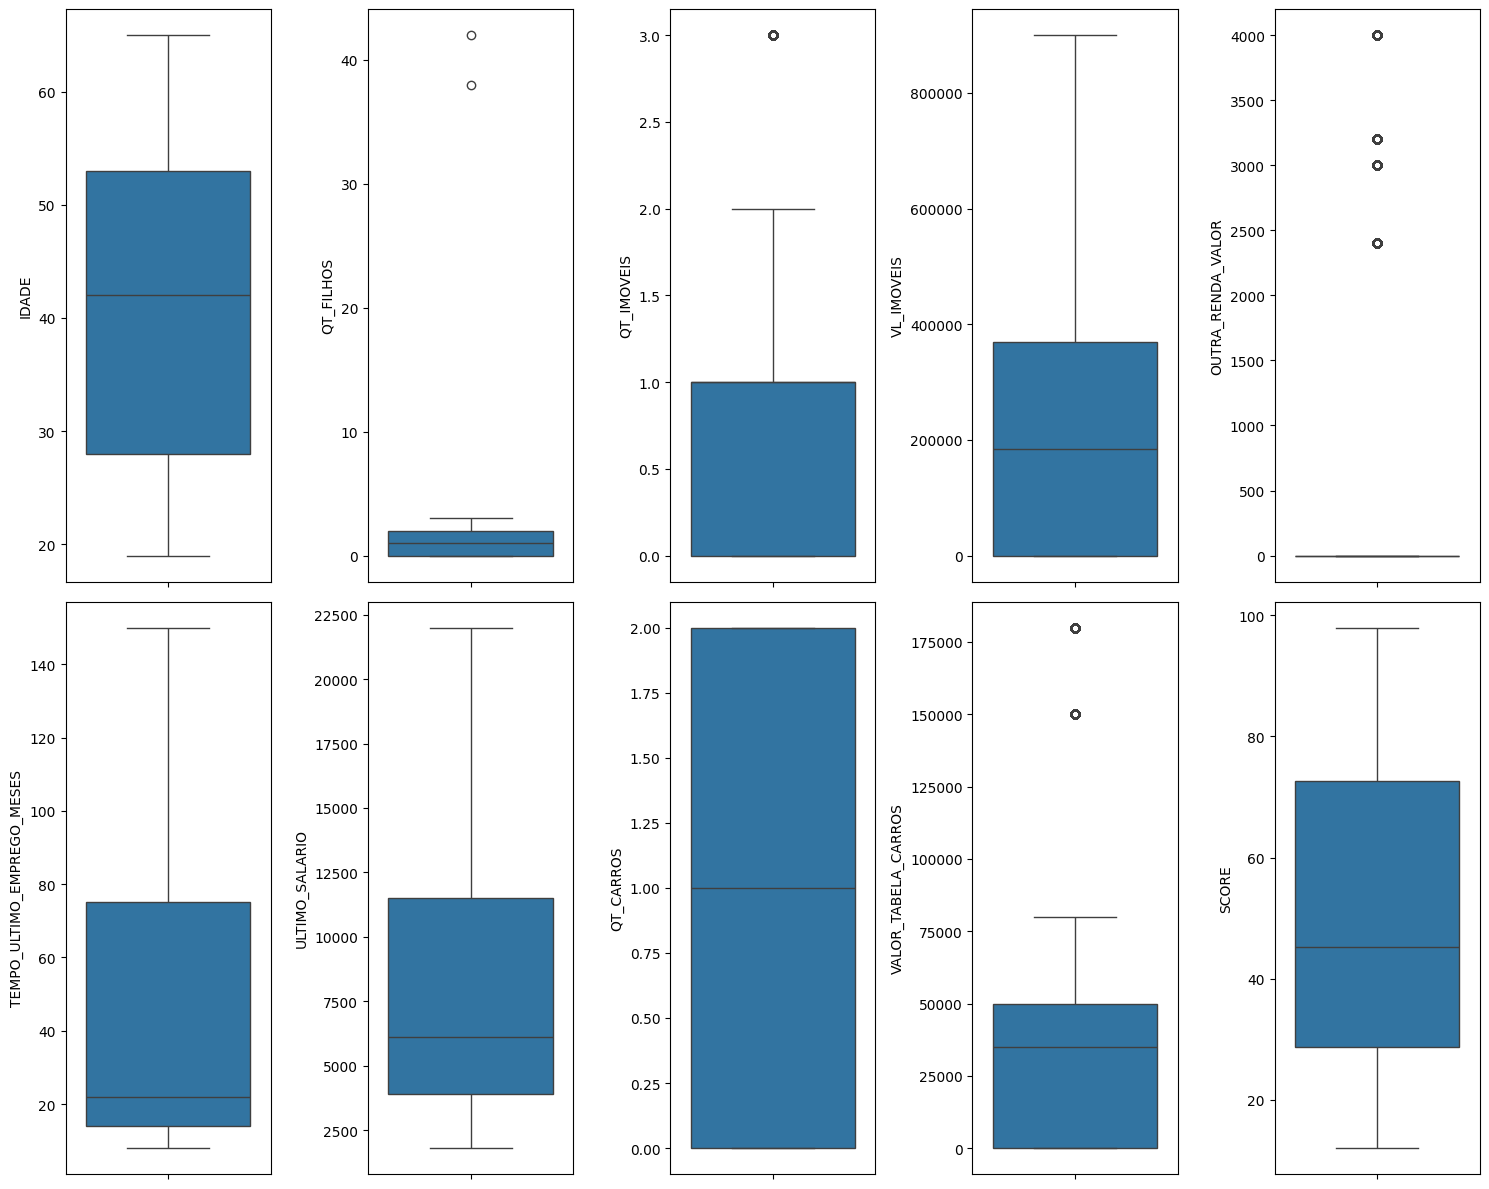

In [ ]:
plt.rcParams['figure.figsize'] = [15.00, 12.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots (2,5)

linha = 0
coluna = 0

for i in colunas_numericas:
  sns.boxplot(data = df, y = i, ax = axes[linha][coluna])
  coluna += 1
  if coluna == 5:
    linha += 1
    coluna = 0

plt.show()

In [ ]:
df.groupby(['QT_FILHOS']).size()

,0
QT_FILHOS,
0,3329
1,3726
2,2303
3,1116
38,1
42,1


In [ ]:
df.loc[df['QT_FILHOS'] > 10]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [ ]:
df.drop(df.loc[df['QT_FILHOS'] > 10].index, inplace=True)

In [ ]:
df.groupby(['OUTRA_RENDA_VALOR']).size()

,0
OUTRA_RENDA_VALOR,
0,8350
2400,468
3000,612
3200,522
4000,522


In [ ]:
df.groupby(['QT_IMOVEIS']).size()

,0
QT_IMOVEIS,
0,4680
1,3761
2,989
3,1044


In [ ]:
df.groupby(['VALOR_TABELA_CARROS']).size()

,0
VALOR_TABELA_CARROS,
0,3762
28000,468
30000,791
35000,792
40000,792
48000,522
50000,1314
70000,521
80000,522


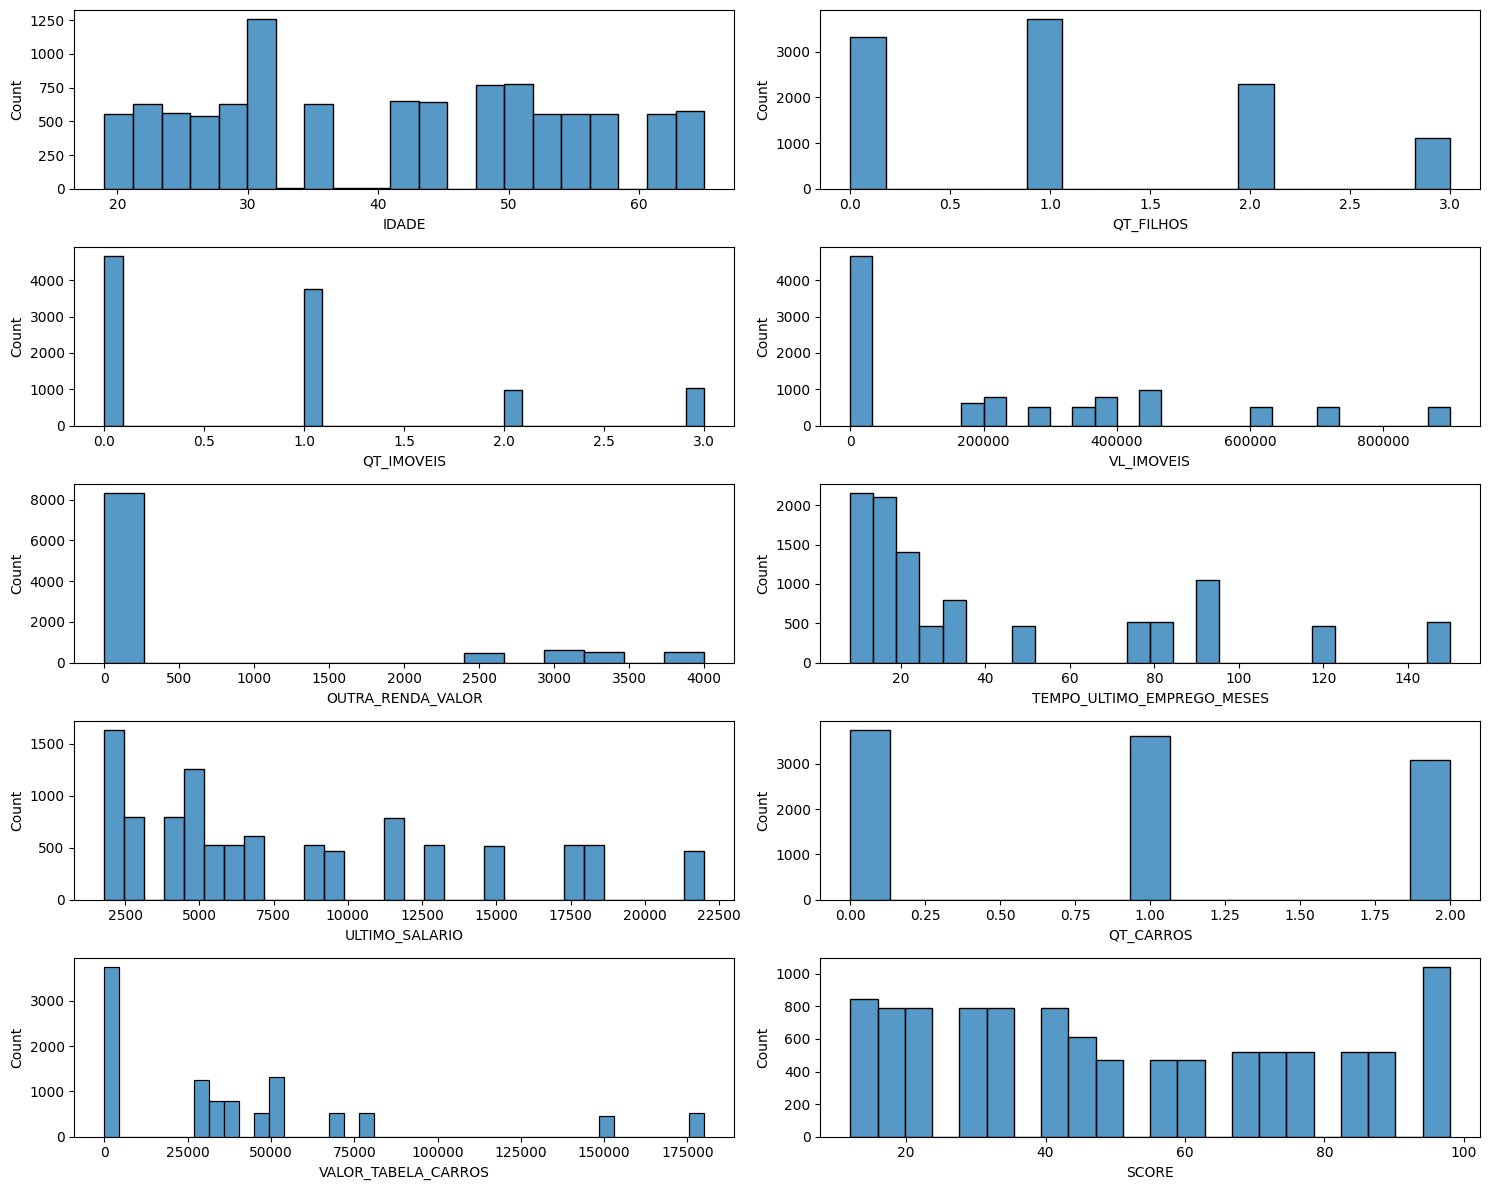

In [ ]:
plt.rcParams['figure.figsize'] = [15.00, 12.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots (5,2)

linha = 0
coluna = 0

for i in colunas_numericas:
  sns.histplot(data = df, x = i, ax = axes[linha][coluna])
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0


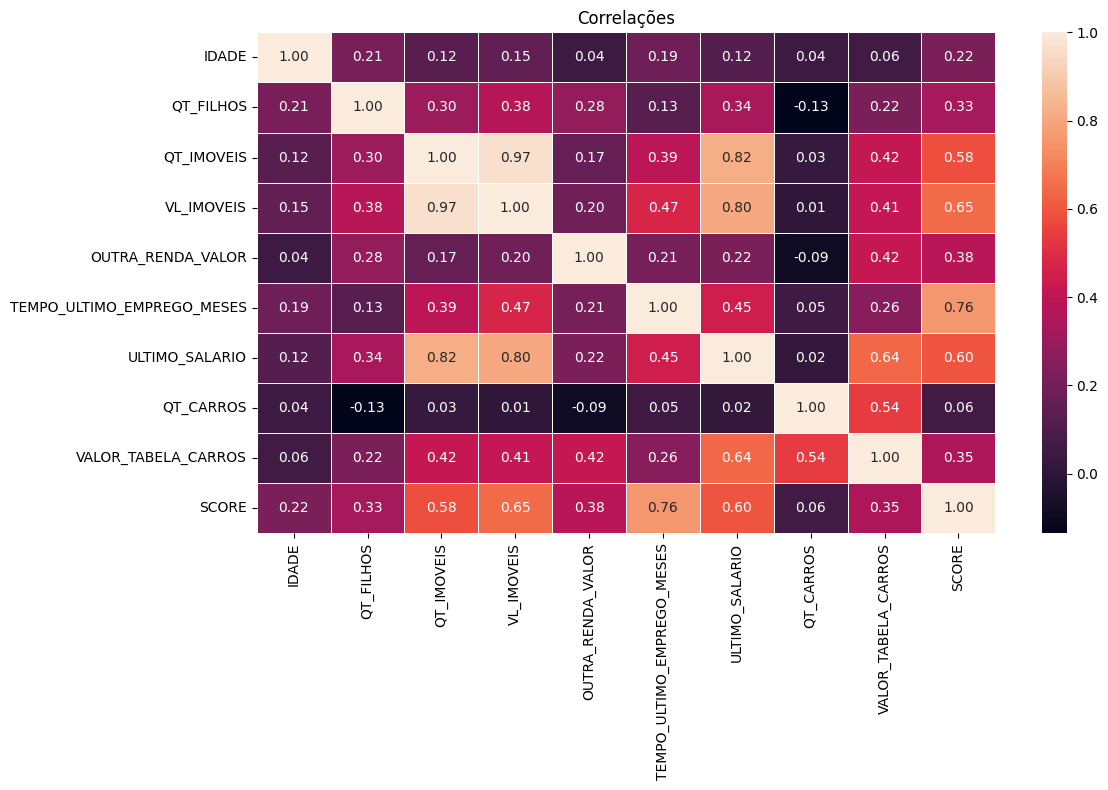

In [ ]:
plt.figure(figsize=(12, 8))

matrix_correlacao = df[colunas_numericas].corr()

sns.heatmap(matrix_correlacao, annot=True, fmt=".2f", linewidths=0.5)

plt.title("Correlações")
plt.show()

### Nota: Observando os gráficos abaixo, que mostram as variáveis 'VL_IMOVEIS', 'TEMPO_ULTIMO_EMPREGO_MESES' e 'ULTIMO_SALARIO' em relação a variável 'SCORE', é notável uma correlção positiva pois a medida qua o valor destas variáveis aumentam, o score também aumenta.



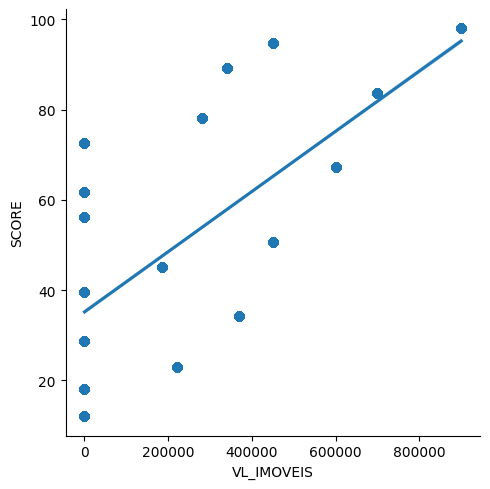

In [ ]:
sns.lmplot(x='VL_IMOVEIS', y='SCORE', data=df)

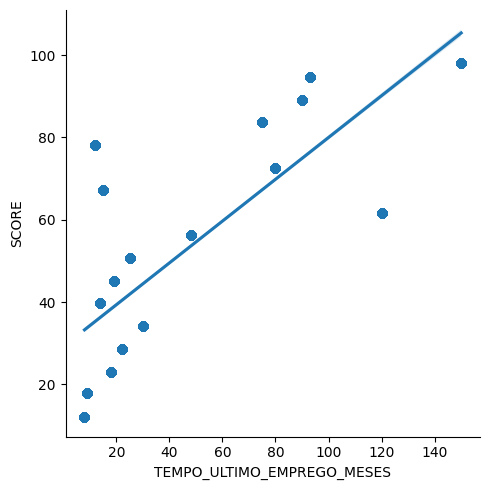

In [ ]:
sns.lmplot(x='TEMPO_ULTIMO_EMPREGO_MESES', y='SCORE', data=df)

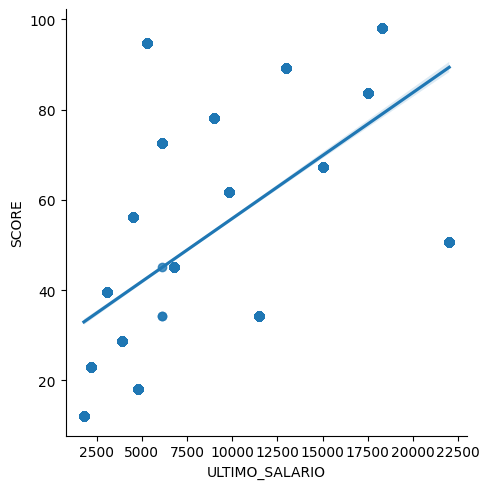

In [ ]:
sns.lmplot(x='ULTIMO_SALARIO', y='SCORE', data=df)

## 3. Pré processamento
   
   Nesta etapa foi criada uma coluna 'FAIXA_ETARIA' para reunir grupos de idades, utilizei One-Hot Encoding, dessa forma as variáveis string conseguem ser interpretadas no modelo de machine learning, após isso foi feita a normalização dos dados e a divisão de treino e teste.



In [ ]:
print('Maior idade: ', df['IDADE'].max())
print('Menor idade: ', df['IDADE'].min())

Maior idade:  65
Menor idade:  19


In [ ]:
bins_idade = [0, 25, 35, 45, 55, 65]
categoria_idade = ['0 a 25', '26 a 35', '36 a 45', '46 a 55', '56 a 65']

df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], bins=bins_idade, labels=categoria_idade)

df['FAIXA_ETARIA'].value_counts()

,count
FAIXA_ETARIA,
26 a 35,3070
46 a 55,2663
0 a 25,1747
56 a 65,1692
36 a 45,1302


In [ ]:
df.groupby(['FAIXA_ETARIA'])['SCORE'].mean()

,SCORE
FAIXA_ETARIA,
0 a 25,42.083953
26 a 35,47.928556
36 a 45,50.121096
46 a 55,55.221868
56 a 65,60.180851


In [ ]:
colunas_categoricas = []
for i in df.columns[0:17].tolist():
  if df.dtypes[i] == 'object' or df.dtypes[i] == 'category' :
    print(i, ':', df.dtypes[i])
    colunas_categoricas.append(i)

UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


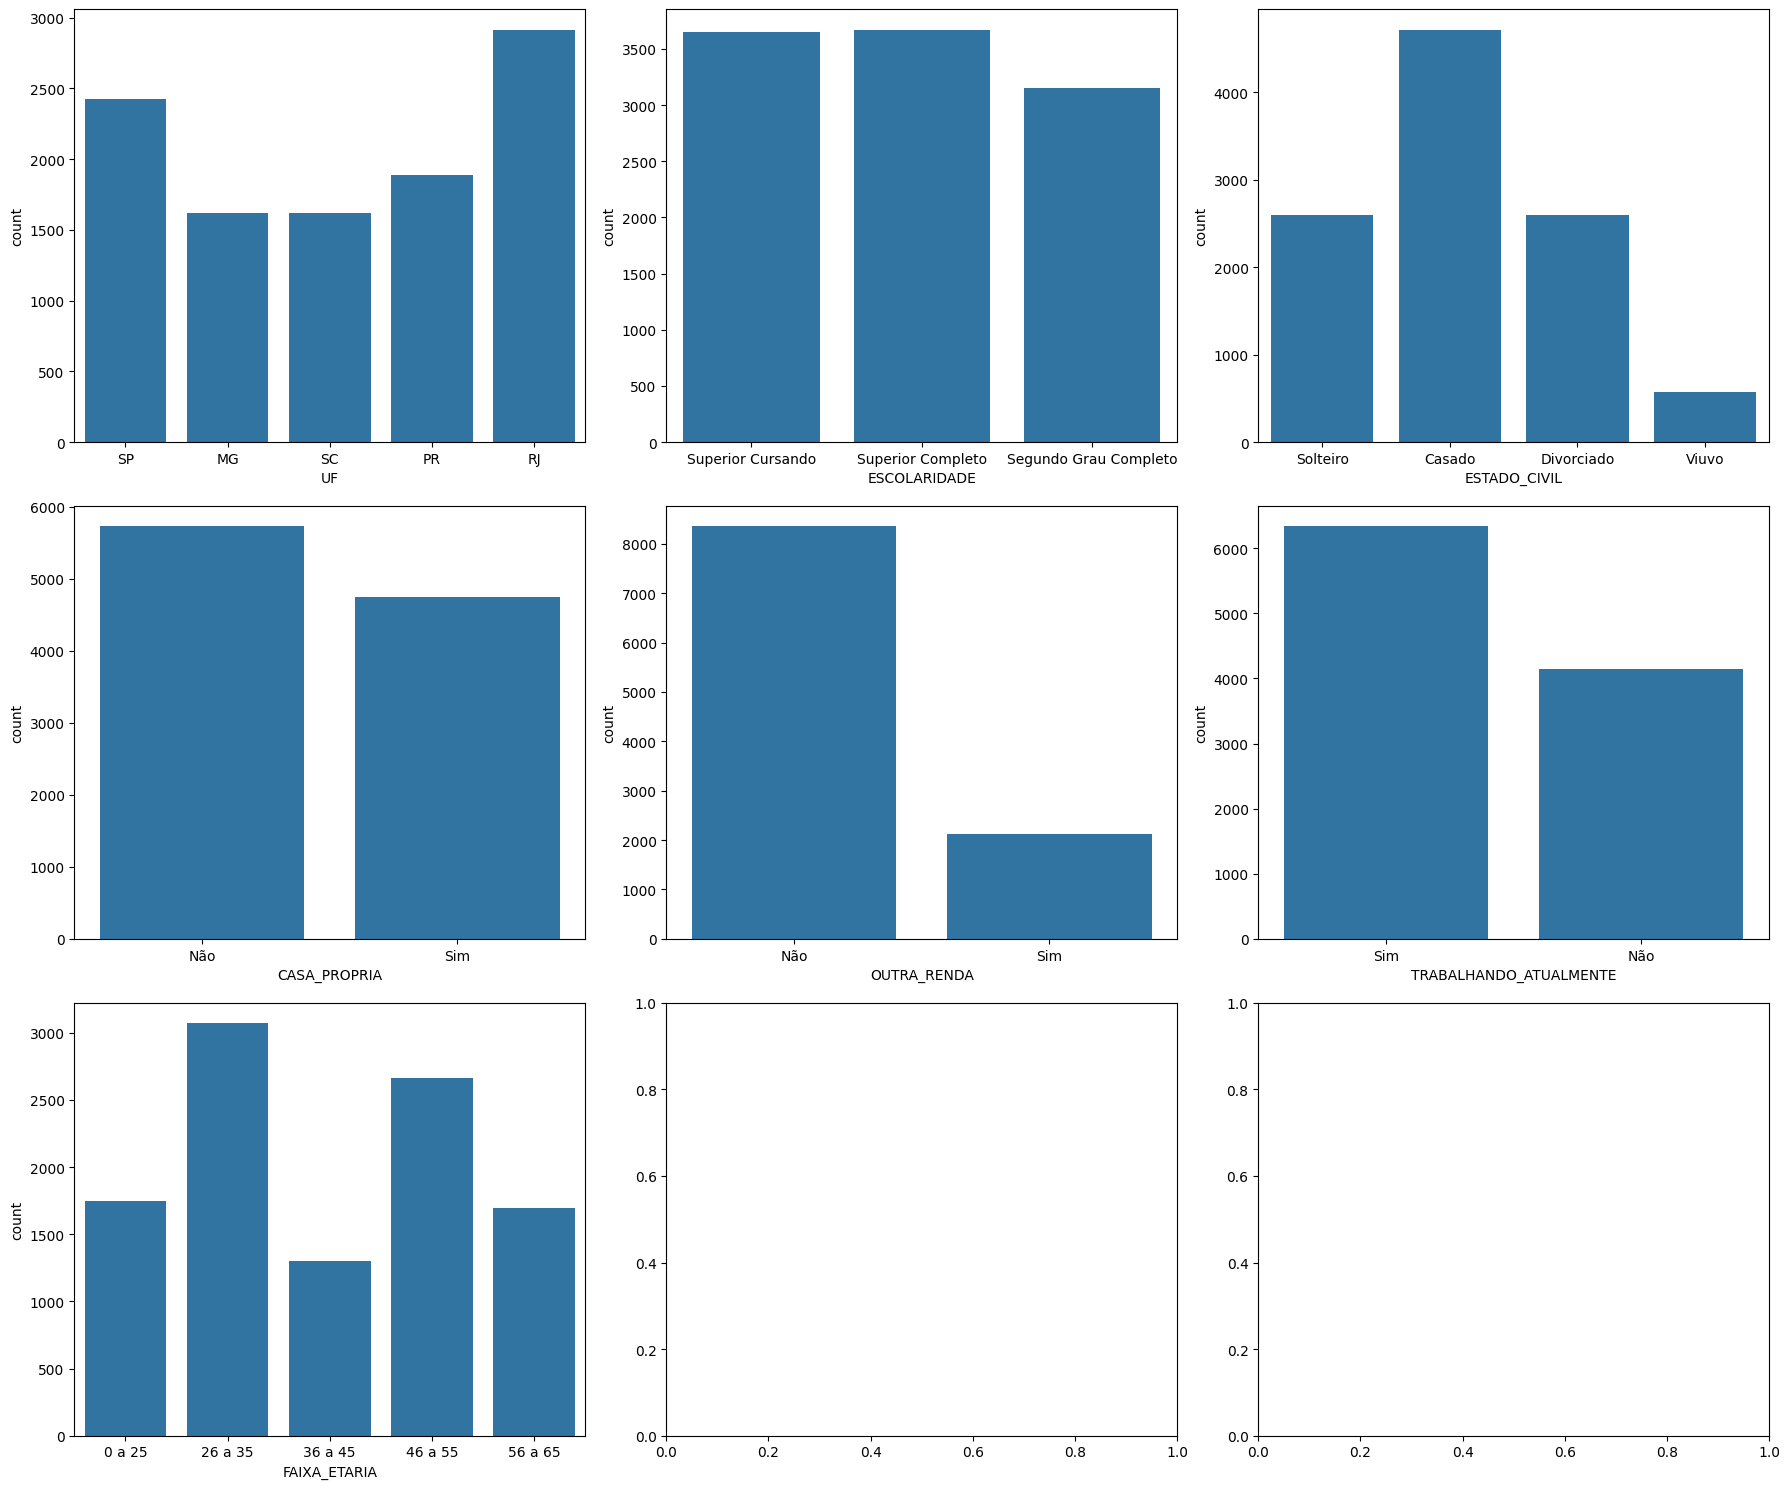

In [ ]:
plt.rcParams['figure.figsize'] = [18.00, 15.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots (3,3)

linha = 0
coluna = 0

for i in colunas_categoricas:
  sns.countplot(data = df[colunas_categoricas], x=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna == 3:
    linha += 1
    coluna = 0

In [ ]:
encoder = LabelEncoder()

df['UF'] = encoder.fit_transform(df['UF'])
df['ESCOLARIDADE'] = encoder.fit_transform(df['ESCOLARIDADE'])
df['ESTADO_CIVIL'] = encoder.fit_transform(df['ESTADO_CIVIL'])
df['CASA_PROPRIA'] = encoder.fit_transform(df['CASA_PROPRIA'])
df['OUTRA_RENDA'] = encoder.fit_transform(df['OUTRA_RENDA'])
df['TRABALHANDO_ATUALMENTE'] = encoder.fit_transform(df['TRABALHANDO_ATUALMENTE'])
df['FAIXA_ETARIA'] = encoder.fit_transform(df['FAIXA_ETARIA'])

df.dropna(inplace=True)

In [ ]:
df.head(100)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,0
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,0
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,0
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,1
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,51,0,1,1,1,0,0,0,0,80,0,6100.0,2,48000,72.666667,3
97,3,53,2,0,2,0,1,280000,0,0,12,1,9000.0,0,0,78.166667,3
98,1,55,1,0,2,0,3,700000,0,0,75,0,17500.0,1,50000,83.666667,3
99,2,57,0,0,3,1,1,340000,1,4000,90,1,13000.0,2,180000,89.166667,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int64  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int64  
 3   ESTADO_CIVIL                10474 non-null  int64  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int64  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int64  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int64  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

In [ ]:
var_previsao = df.iloc[:,15:16]

In [ ]:
var_preditora = df.copy()
del var_preditora['SCORE']
var_preditora.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,0
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,0
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,0
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,1
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(var_preditora, var_previsao, test_size=0.3, random_state=127)

In [ ]:
normalizacao = MinMaxScaler()
treino_normalizado = normalizacao.fit_transform(X_train)
teste_normalizado = normalizacao.transform(X_test)

## 4. Construção do modelo de ML

   - O algoritmo de regressão linear foi escolhido por causa de sua  simplicidade e eficiência para identificar como variáveis como renda, idade e influenciam a probabilidade de inadimplência.

   - Para avaliar o modelo foi escolhida a métrica $r^2 score$ (ou coeficiente de determinação, que informa o quanto melhor o seu modelo é, em comparação com simplesmente "chutar" a média dos preços.) que resultou em 80,59% de chance da predição estar correta.

In [ ]:
modelo = LinearRegression()
modelo = modelo.fit(treino_normalizado, y_train)

In [ ]:
r2_score(y_test, modelo.fit(treino_normalizado, y_train).predict(teste_normalizado))

0.8059494980092308

## 5. Simulação do modelo com a inserção de novos dados

In [ ]:
UF = 2
IDADE = 55
ESCOLARIDADE = 3
ESTADO_CIVIL = 2
QT_FILHOS = 2
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 500000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2000
TEMPO_ULTIMO_EMPREGO_MESES = 22
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 8500.0
QT_CARROS = 2
VALOR_TABELA_CARROS = 70000
FAIXA_ETARIA = 3

dados_simulacao = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,
               OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]

X = np.array(dados_simulacao).reshape(1, -1)
X = normalizacao.transform(X)

print("O Score de crédito previsto para esse cliente é de ", modelo.predict(X))

O Score de crédito previsto para esse cliente é de  [[38.04627229]]
